In [15]:
# import names

words = open('names.txt').read().splitlines()

In [16]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [17]:
len(words)

32033

In [20]:
min(len(w) for w in words)

2

In [21]:
max(len(w) for w in words)

15

In [66]:
list(aa)

['e', 'm', 'm', 'a']

In [90]:
b = {}

b['a'] =1
b.get('a')
b.get('b')
# b

b.get('b', 0)

0

In [98]:
b = {}

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [107]:
?sorted

Signature: sorted(iterable, /, *, key=None, reverse=False)
Docstring:
Return a new list containing all items from the iterable in ascending order.

A custom key function can be supplied to customize the sort order, and the
reverse flag can be set to request the result in descending order.
Type:      builtin_function_or_method


In [120]:
# Example for sorting on a second key
sorted((('a', 10), ('b', 5)), key = lambda x: -x[1])

[('a', 10), ('b', 5)]

In [123]:
sorted(b.items(), key=lambda x: -x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [133]:
import torch

In [211]:
# testing tensors

a = torch.zeros((3,5), dtype=torch.int32)
a[2,2]=1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]], dtype=torch.int32)

In [235]:
chars = sorted(list({ch for w in words for ch in w}))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0

stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [238]:
N = torch.zeros((27,27), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [241]:
itos = {i:s for s,i in stoi.items()}

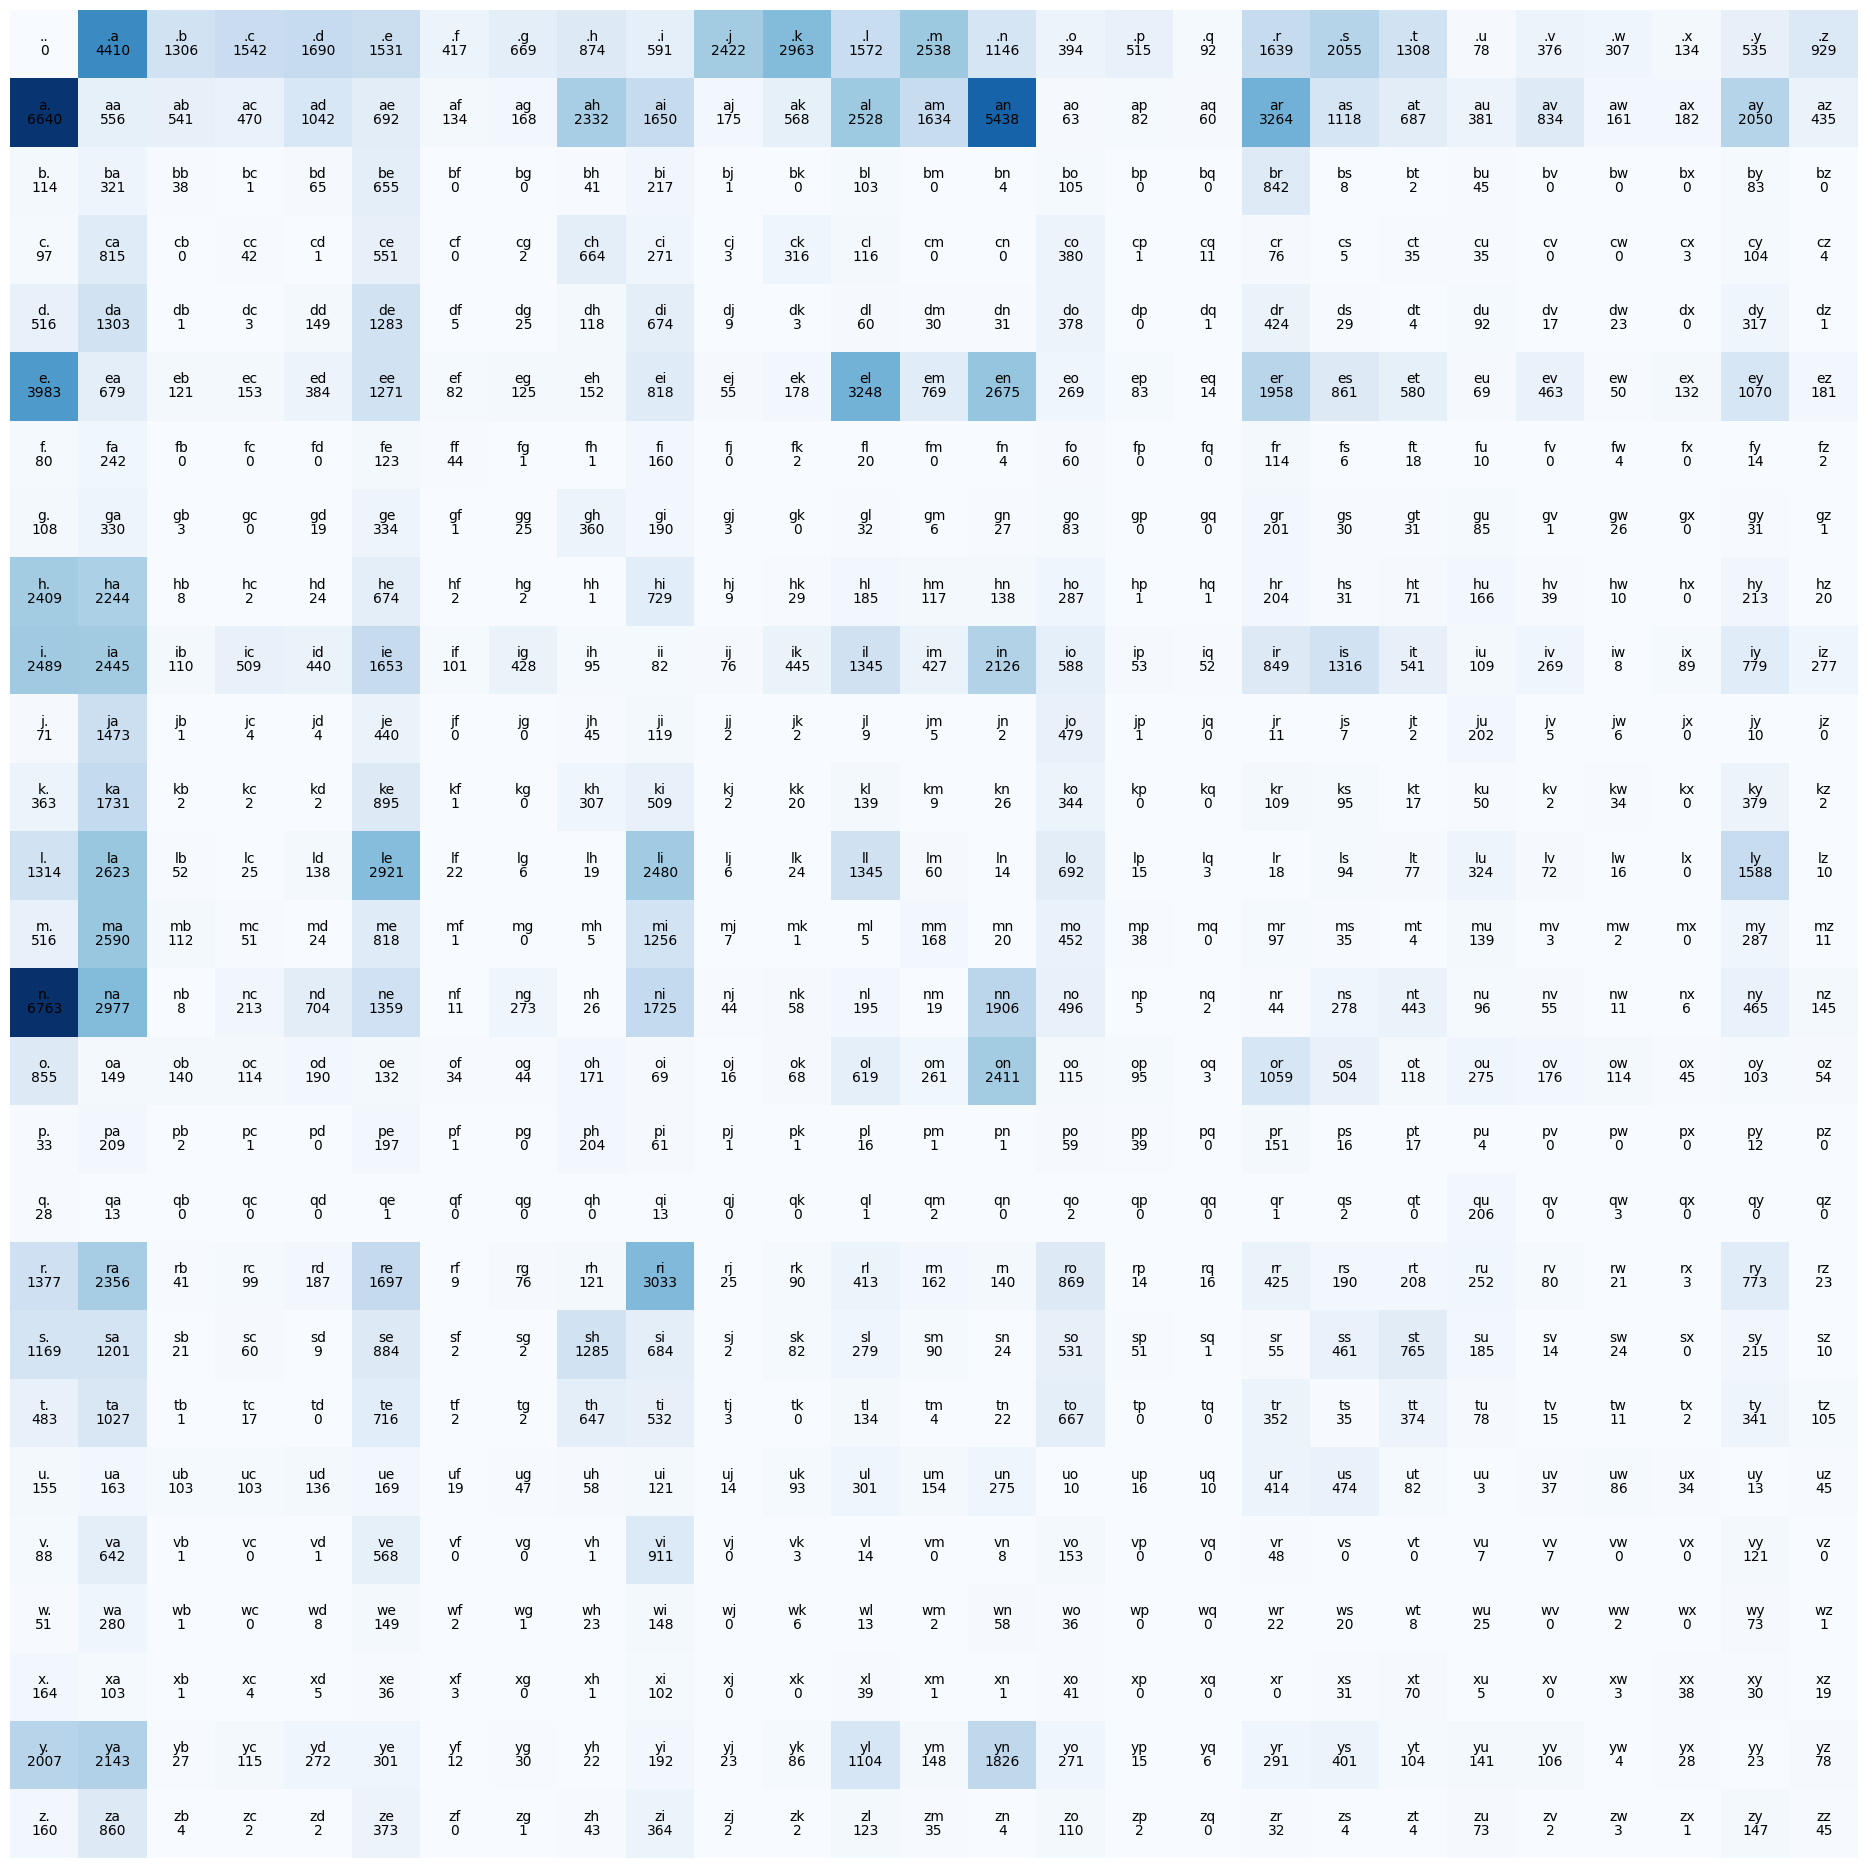

In [243]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(24,24))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='black')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='black')
plt.axis('off');

In [248]:
N[0, :].shape

torch.Size([27])

In [328]:
N.shape

torch.Size([27, 27])

In [421]:
# P = N.float() 
P = (N+1).float()  # model smoothing!
P /= P.sum(dim=1, keepdim=True)

# 27 27 
# 27 1

In [422]:
g = torch.Generator().manual_seed(2147483647) 

for i in range(5):
    out=[]
    ix = 0
    while True:
        p = P[ix]        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0: 
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [408]:
# GOAL : maximise likelihood of the data wrt the model parameters
# equivalent to maximising the log likelihood (because log is monotonic)
# equivalent to minimising the negative log likelihood
# equivalent to minimising the average negative log likelihood

In [423]:
log_likelihood = 0.0
n = 0

for w in words:
# for w in ["qq"]:  # model smoothing fixes these
# for w in ["a", "aa"]: # IDEA: add normalising per word ... ? 
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
        
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-13.8764)
nll=tensor(13.8764)
4.625452518463135


In [455]:
# create the training set of bigrams

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        print(ch1, ch2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [456]:
xs

tensor([ 0,  5, 13, 13,  1])

In [457]:
ys

tensor([ 5, 13, 13,  1,  0])

In [445]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

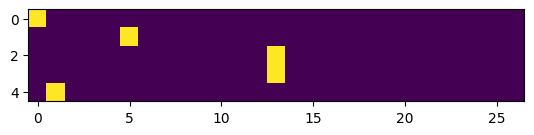

In [446]:
plt.imshow(xenc)

In [468]:
W = torch.randn((27,27)) # 27 inputs x 27 neurons

In [470]:
# (5, 27) @ (27, 27) -> (5, 27)
(xenc[:5] @ W).shape

torch.Size([5, 27])

In [469]:
logits = xenc @ W     # log-counts
counts = logits.exp() # equivalent to the N matrix
probs = counts / counts.sum(dim=1, keepdim=True)
probs

tensor([[0.1105, 0.0103, 0.0084, 0.0896, 0.0110, 0.0091, 0.0205, 0.0028, 0.0681,
         0.0228, 0.0232, 0.0148, 0.0190, 0.0282, 0.0453, 0.0057, 0.0361, 0.0170,
         0.0214, 0.0907, 0.0094, 0.1342, 0.0796, 0.0041, 0.0640, 0.0172, 0.0372],
        [0.0095, 0.0242, 0.0199, 0.1076, 0.0533, 0.0325, 0.0185, 0.0161, 0.0786,
         0.0097, 0.0218, 0.0162, 0.0121, 0.0391, 0.0194, 0.0102, 0.0629, 0.1383,
         0.1026, 0.0095, 0.0543, 0.0279, 0.0146, 0.0052, 0.0296, 0.0534, 0.0132],
        [0.0256, 0.0888, 0.0183, 0.0163, 0.0094, 0.0885, 0.0426, 0.0092, 0.0092,
         0.0051, 0.0077, 0.0438, 0.0492, 0.0115, 0.0149, 0.0168, 0.0074, 0.3160,
         0.0114, 0.0198, 0.0096, 0.0576, 0.0137, 0.0204, 0.0354, 0.0251, 0.0267],
        [0.0256, 0.0888, 0.0183, 0.0163, 0.0094, 0.0885, 0.0426, 0.0092, 0.0092,
         0.0051, 0.0077, 0.0438, 0.0492, 0.0115, 0.0149, 0.0168, 0.0074, 0.3160,
         0.0114, 0.0198, 0.0096, 0.0576, 0.0137, 0.0204, 0.0354, 0.0251, 0.0267],
        [0.0026, 0.0184,

In [467]:
probs[0].sum()

tensor(1.)

In [466]:
probs.shape

torch.Size([5, 27])

In [ ]:
# SUMMARY ==============================

In [471]:
xs

tensor([ 0,  5, 13, 13,  1])

In [472]:
ys

tensor([ 5, 13, 13,  1,  0])

In [490]:
# randomly initialise 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [485]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one_hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilites for next character
# btw: the last 2 lines together are called a softmax

In [482]:
probs.shape

torch.Size([5, 27])

In [491]:

nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0049, 0.0959, 0.0281, 0.0703, 0.0961, 0.0573, 0.0241, 0.0135, 0.0093,
        0.1416, 0.0225, 0.0217, 0.0513, 0.0106, 0.0097, 0.0291, 0.0229, 0.0273,
        0.0325, 0.0275, 0.0446, 0.0501, 0.0214, 0.0093, 0.0120, 0.0354, 0.0310])
label (actual next character): 5
probability assigned by the net to the correct character: 0.05734505504369736
log likelihood: -2.858668565750122
negative log likelihood: 2.858668565750122
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0426, 0.0113, 0.0266, 0.0507, 0.2370, 0.0580, 0.0421, 0.0094, 0.0136,
        0.0297, 0.0044, 0.0782, 0.1028, 0.0146, 0.0172, 0.0288, 0.0263, 0.0319,
        0.0248, 0.0210, 0.0063, 0.0057, 0.0309, 0.0269, 0.0298, 0.0089, 0.0205])
label (actual next character): 13
probability assigned by the net to the correct character: 0.01458862